In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/ankurroy/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
file_name='UnitedHealthCare_stock_history.csv'
file_data=pd.read_csv(file_name)

## Section 2


In [3]:
file_data['Open']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
9401    498.649994
9402    481.750000
9403    484.910004
9404    481.350006
9405    497.000000
Name: Open, Length: 9406, dtype: float64

In [4]:
#the opening prices of stocks per day and closing prices are determined to calculate the net value earned/lost in a day fo trading

opening_price=file_data['Open']
closing_price=file_data['Close']
volume=file_data['Volume']

net_worth_pd=volume*(-closing_price+opening_price)  #the net income at the end of each day of trading
date=file_data['Date']
date=np.array(date)
date_yr=[x.rsplit('-') for x in date]
year=[int(date_yr[i][0]) for i in range(len(date_yr))]
month=[int(date_yr[i][1]) for i in range(len(date_yr))]
day=[int(date_yr[i][2]) for i in range(len(date_yr))]
year=np.array(year)



In [5]:
   
def worth_quarter(low_range,high_range):
    index_loc=np.where((year >= low_range) & (year <=high_range))[0] 
    First_quarter=[]
    Second_quarter=[]
    Third_quarter=[]
    Fourth_quarter=[]
    for i in np.unique(year[index_loc]):
        j=np.where(year==i)[0]
        net_worth_1=[]
        net_worth_2=[]
        net_worth_3=[]
        net_worth_4=[]
        for k in j:
            if 1<=month[k]<=3: 
                net_worth_1.append(net_worth_pd[k])
            elif 4<=month[k]<=6:
                net_worth_2.append(net_worth_pd[k])
            elif 7<=month[k]<=9:
                net_worth_3.append(net_worth_pd[k])
            elif 10<=month[k]<=12:
                net_worth_4.append(net_worth_pd[k]) 
                
        for lst in (net_worth_1,net_worth_2,net_worth_3,net_worth_4):
            if lst==[]:
                lst.append(0.0)
            else:
                pass
        First_quarter.append(np.mean(net_worth_1)/1e7)
        Second_quarter.append(np.mean(net_worth_2)/1e7)
        Third_quarter.append(np.mean(net_worth_3)/1e7)
        Fourth_quarter.append(np.mean(net_worth_4)/1e7)
       
        
    bar_plot = pd.DataFrame({'First Quarter mean income': First_quarter,
                          'Second Quarter mean income': Second_quarter,
                            'Third Quarter mean income': Third_quarter,
                            'Fourth Quarter mean income': Fourth_quarter},
                           index=np.unique(year[index_loc]).tolist())
    bar_plot.plot(kind = 'bar', stacked = True, color = ['Blue', 'yellow', 'green','Orange'])
    plt.ylabel('Mean income of United Healthcare stock (\$ $\mathregular{10^{7}}$)')
    plt.xlabel('Year ')
    plt.xticks(rotation=0, ha='right')

    plt.show()
    

    
    

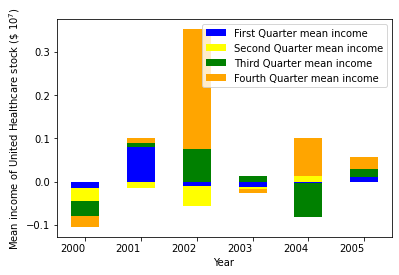

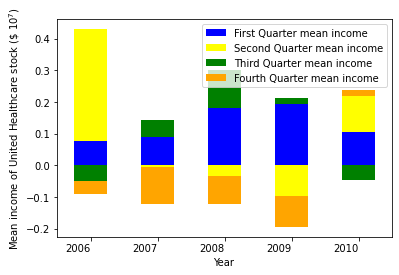

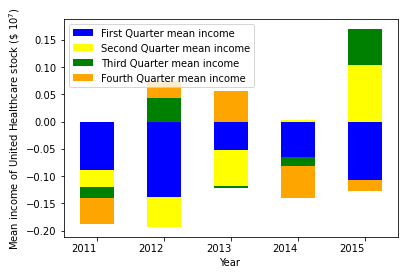

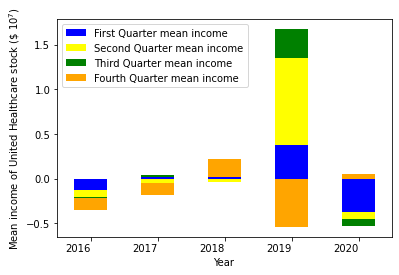

In [6]:
worth_quarter(2000,2005),worth_quarter(2006,2010)
worth_quarter(2011,2015)
worth_quarter(2016,2020)
